<a href="https://colab.research.google.com/github/nicholasrazali/data-mining-klasifikasi/blob/main/Data_Mining_(Klasifikasi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# datasets dari https://www.kaggle.com/code/baptistemistral/97-7-accuracy-gender-classification
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
df.isnull()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False
4999,False,False,False,False,False,False,False,False


In [ ]:
x = df.drop(["gender"], axis=1)
x.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [ ]:
y = df["gender"]
y.head()

0      Male
1    Female
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## menggunakan algoritma C4.5
c = DecisionTreeClassifier(max_depth=3);
c.fit(x_train, y_train)
y_pred_c = c.predict(x_test)
y_pred_c

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype=object)

[Text(0.5, 0.875, 'X[3] <= 0.014\ngini = 0.5\nsamples = 4000\nvalue = [2002, 1998]'),
 Text(0.25, 0.625, 'X[5] <= 0.015\ngini = 0.222\nsamples = 2028\nvalue = [1770, 258]'),
 Text(0.125, 0.375, 'X[2] <= 1.123\ngini = 0.037\nsamples = 1578\nvalue = [1548, 30]'),
 Text(0.0625, 0.125, 'gini = 0.025\nsamples = 1568\nvalue = [1548, 20]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.375, 0.375, 'X[6] <= 0.008\ngini = 0.5\nsamples = 450\nvalue = [222, 228]'),
 Text(0.3125, 0.125, 'gini = 0.241\nsamples = 221\nvalue = [190, 31]'),
 Text(0.4375, 0.125, 'gini = 0.24\nsamples = 229\nvalue = [32, 197]'),
 Text(0.75, 0.625, 'X[4] <= -0.022\ngini = 0.208\nsamples = 1972\nvalue = [232, 1740]'),
 Text(0.625, 0.375, 'X[6] <= 0.008\ngini = 0.5\nsamples = 405\nvalue = [208, 197]'),
 Text(0.5625, 0.125, 'gini = 0.22\nsamples = 215\nvalue = [188, 27]'),
 Text(0.6875, 0.125, 'gini = 0.188\nsamples = 190\nvalue = [20, 170]'),
 Text(0.875, 0.375, 'X[6] <= 0.008\ngini = 0.03\nsam

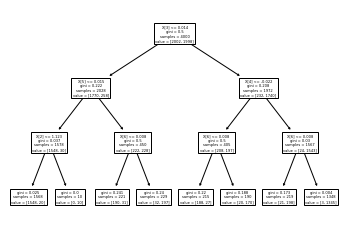

In [ ]:
tree.plot_tree(c)

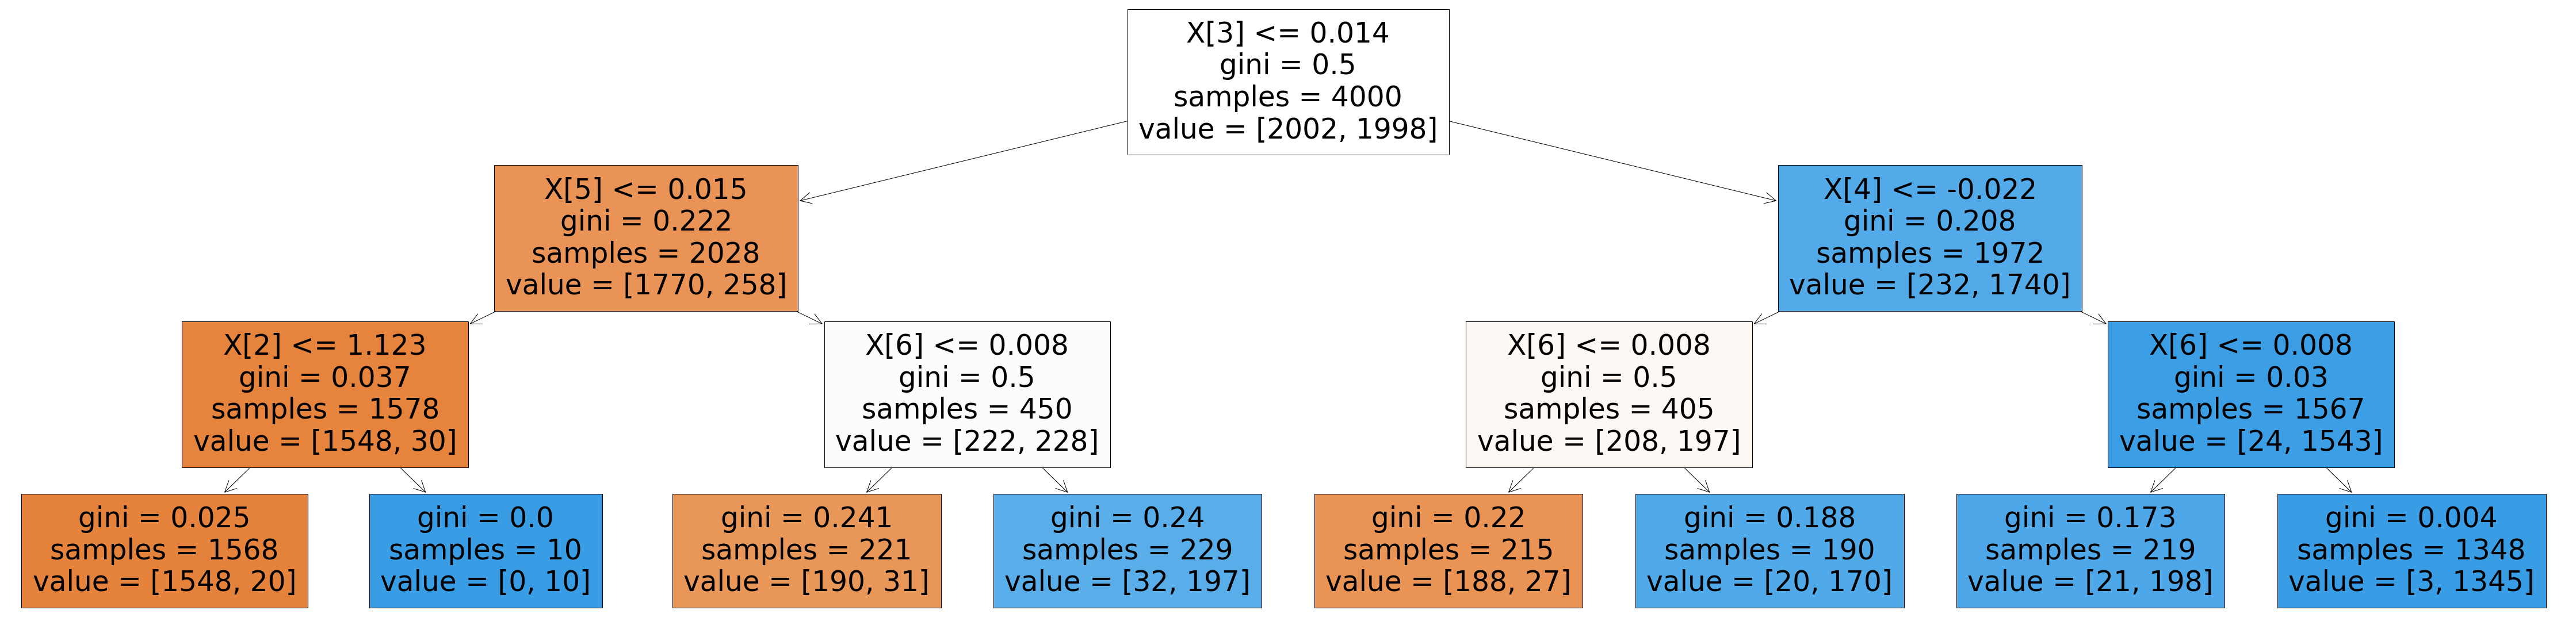

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(80, 20))
_ = tree.plot_tree(c,filled=True)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# model dengan full data as data training
c = DecisionTreeClassifier(max_depth=3);
c.fit(x, y)
y_pred_c = c.predict(x_test)
y_pred_c
accuracy_score(y_test, y_pred_c)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.9690309690309691

In [ ]:
c = DecisionTreeClassifier(max_depth=3);
c.fit(x_train, y_train)
y_pred_c = c.predict(x_test)
y_pred_c

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [ ]:
accuracy_score(y_test, y_pred_c)

0.971028971028971

In [ ]:
from sklearn.utils import resample

c_bs_accuracy = []
iterations = 1000
for i in range(iterations):
    x_bs, y_bs = resample(x_train, y_train, replace=True)
    # make predictions
    y_pred_bs = c.predict(x_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_pred_bs)
    c_bs_accuracy.append(score)

mean(c_bs_accuracy)

0.961512

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(c, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
mean(scores)

0.963003992015968

In [ ]:
cm_c = confusion_matrix(y_test, y_pred_c)

print('Confusion matrix\n\n', cm_c)
print('\nTrue Positives(TP) = ', cm_c[0,0])
print('\nTrue Negatives(TN) = ', cm_c[1,1])
print('\nFalse Positives(FP) = ', cm_c[0,1])
print('\nFalse Negatives(FN) = ', cm_c[1,0])

Confusion matrix

 [[483  16]
 [ 13 489]]

True Positives(TP) =  483

True Negatives(TN) =  489

False Positives(FP) =  16

False Negatives(FN) =  13


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97       499
        Male       0.97      0.97      0.97       502

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [ ]:
TP = cm_c[0,0]
TN = cm_c[1,1]
FP = cm_c[0,1]
FN = cm_c[1,0]

In [ ]:
c_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('C4.5 accuracy : {0:0.4f}'.format(c_accuracy))

C4.5 accuracy : 0.9710


In [ ]:
c_precision = TP / float(TP + FP)

print('C4.5 Precision : {0:0.4f}'.format(c_precision))

C4.5 Precision : 0.9679


In [ ]:
c_recall = TP / float(TP + FN)

print('C4.5 Recall or Sensitivity : {0:0.4f}'.format(c_recall))

C4.5 Recall or Sensitivity : 0.9738


In [ ]:
c_specificity = TN / (TN + FP)

print('C4.5 Specificity : {0:0.4f}'.format(c_specificity))

C4.5 Specificity : 0.9683


In [ ]:
c_fscore = 2 * (c_precision * c_recall) / (c_precision + c_recall)
print('C4.5 F-Score : {0:0.4f}'.format(c_fscore))

C4.5 F-Score : 0.9709


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred_gnb = gnb.predict(x_test)
y_pred_gnb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype='<U6')

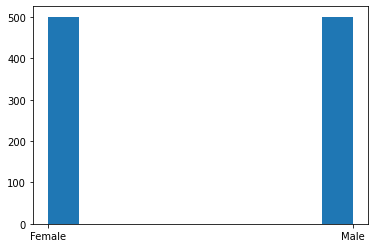

In [ ]:
plt.hist((y_pred_gnb), bins=10)
plt.show()

In [ ]:
# model dengan full data as data training
gnb = GaussianNB()
gnb.fit(x, y)

y_pred_gnb = gnb.predict(x_test)
y_pred_gnb
accuracy_score(y_test, y_pred_gnb)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


0.5014985014985015

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred_gnb = gnb.predict(x_test)
y_pred_gnb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype='<U6')

In [ ]:
gnb_bs_accuracy = []
iterations = 1000
for i in range(iterations):
    x_bs, y_bs = resample(x_train, y_train, replace=True)
    # make predictions
    y_pred_bs = c.predict(x_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_pred_bs)
    gnb_bs_accuracy.append(score)

In [ ]:
mean(gnb_bs_accuracy)

0.9616714999999999

In [ ]:
accuracy_score(y_test, y_pred_gnb)

0.968031968031968

In [ ]:
cv_gnb = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(gnb, x_train, y_train, scoring='accuracy', cv=cv_gnb ,n_jobs=-1)
mean(scores)

0.9692500000000001

In [ ]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

print('Confusion matrix\n\n', cm_gnb)
print('\nTrue Positives(TP) = ', cm_gnb[0,0])
print('\nTrue Negatives(TN) = ', cm_gnb[1,1])
print('\nFalse Positives(FP) = ', cm_gnb[0,1])
print('\nFalse Negatives(FN) = ', cm_gnb[1,0])

Confusion matrix

 [[484  15]
 [ 17 485]]

True Positives(TP) =  484

True Negatives(TN) =  485

False Positives(FP) =  15

False Negatives(FN) =  17


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

      Female       0.97      0.97      0.97       499
        Male       0.97      0.97      0.97       502

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [ ]:
TP = cm_gnb[0,0]
TN = cm_gnb[1,1]
FP = cm_gnb[0,1]
FN = cm_gnb[1,0]

In [ ]:
gnb_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Naive Bayes accuracy : {0:0.4f}'.format(gnb_accuracy))

Naive Bayes accuracy : 0.9680


In [ ]:
gnb_precision = TP / float(TP + FP)

print('Naive Bayes Precision : {0:0.4f}'.format(gnb_precision))

Naive Bayes Precision : 0.9699


In [ ]:
gnb_recall = TP / float(TP + FN)

print('Naive Bayes Recall or Sensitivity : {0:0.4f}'.format(gnb_recall))

Naive Bayes Recall or Sensitivity : 0.9661


In [ ]:
gnb_specificity = TN / (TN + FP)

print('Naive Bayes Specificity : {0:0.4f}'.format(gnb_specificity))

Naive Bayes Specificity : 0.9700


In [ ]:
gnb_fscore = 2 * (gnb_precision * gnb_recall) / (gnb_precision + gnb_recall)
print('Naive Bayes F-Score : {0:0.4f}'.format(gnb_fscore))

Naive Bayes F-Score : 0.9680
